In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
unzip:  cannot find or open /content/drive/MyDrive/nnfl/nnfl-2021-assignment-1.zip, /content/drive/MyDrive/nnfl/nnfl-2021-assignment-1.zip.zip or /content/drive/MyDrive/nnfl/nnfl-2021-assignment-1.zip.ZIP.


In [ ]:
! sudo unzip /content/drive/MyDrive/nnfl-assignment1-data/nnfl-2021-assignment-1.zip -d ~/input

Streaming output truncated to the last 5000 lines.
  inflating: /root/input/fire_videos/train/63_61_284.jpg  
  inflating: /root/input/fire_videos/train/63_61_285.jpg  
  inflating: /root/input/fire_videos/train/63_61_286.jpg  
  inflating: /root/input/fire_videos/train/63_61_287.jpg  
  inflating: /root/input/fire_videos/train/63_61_288.jpg  
  inflating: /root/input/fire_videos/train/63_61_289.jpg  
  inflating: /root/input/fire_videos/train/63_61_29.jpg  
  inflating: /root/input/fire_videos/train/63_61_290.jpg  
  inflating: /root/input/fire_videos/train/63_61_291.jpg  
  inflating: /root/input/fire_videos/train/63_61_292.jpg  
  inflating: /root/input/fire_videos/train/63_61_293.jpg  
  inflating: /root/input/fire_videos/train/63_61_294.jpg  
  inflating: /root/input/fire_videos/train/63_61_295.jpg  
  inflating: /root/input/fire_videos/train/63_61_296.jpg  
  inflating: /root/input/fire_videos/train/63_61_297.jpg  
  inflating: /root/input/fire_videos/train/63_61_298.jpg  
  infl

In [ ]:
! cp /content/drive/MyDrive/nnfl-assignment1-data/Idle_Submission.csv /content

# Data

In [ ]:
import numpy as np
import csv
import cv2
import time
import gc

image_height = 256
image_width = 256

In [ ]:
s = time.time()

train_pic_names = []
train_pic_labels = []

train_csv = open('/root/input/fire_videos/train.csv')
reader = csv.DictReader(train_csv)

for row in reader:
    train_pic_names.append(row['File'])
    train_pic_labels.append([1,0] if row['True_Label']=='fire' else [0,1])
    
train_csv.close()

e = time.time()
print(e-s)

gc.collect()

0.291994571685791


0

In [ ]:
train_address = '/root/input/fire_videos/train/'
train_pic = []
train_label = []

i=0
s = time.time()

while i<=len(train_pic_names):
    image = cv2.imread(train_address+train_pic_names[i])
    image = cv2.resize(image, (image_width, image_height))
    train_pic.append(image)
    train_label.append(train_pic_labels[i])
    i += 10
    
e = time.time()
print(e-s)

train_pic = np.array(train_pic)
train_label = np.array(train_label)
gc.collect()

42.26001310348511


164

In [ ]:
shuffeler = np.random.permutation(len(train_pic))
train_pic_permuted = train_pic[shuffeler]
train_label_permuted = train_label[shuffeler]

# Commented

In [ ]:
# # creatin the split
# s = time.time()
# total = len(labels)
# permuted_index = np.random.permutation(total)
# split = int(total*0.1)
# validate_index, train_index = permuted_index[:split], permuted_index[split:]
# e = time.time()
# print(e-s)



# # Train
# train_address = '../input/nnfl-2021-assignment-1/fire_videos/train/'
# train_pic = []
# train_label = []

# s = time.time()
# for i in train_index:
#     image = cv2.imread(train_address+train_pic_names[i])
#     image = cv2.resize(image, (image_width, image_height))
#     train_pic.append(image)
#     train_label.append(labels[i])
# e = time.time()
# print(e-s)

# train_pic = np.array(train_pic)
# train_label = np.array(train_label)
# gc.collect()



# # Validate
# validate_pic = []
# validate_label = []

# s = time.time()
# for i in validate_index:
#     image = cv2.imread(train_address+train_pic_names[i])
#     image = cv2.resize(image, (image_width, image_height))
#     validate_pic.append(image)
#     validate_label.append(labels[i])
# e = time.time()
# print(e-s)

# validate_pic = np.array(validate_pic)
# validate_label = np.array(validate_label)
# gc.collect()

In [ ]:
# gc.collect()

In [ ]:
# s = time.time()
# tr_p = np.concatenate((train_pic, validate_pic))
# tr_l = np.concatenate((train_label, validate_label))
# e = time.time()
# print(e-s)

# CNN Models

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
# for i in gpus:
#     print(i)
#     tf.config.experimental.set_memory_growth(i, True)

In [ ]:
typeVGG = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (image_width, image_height,3)),
                              tf.keras.layers.MaxPool2D((4,4)),
                              
                              tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                              tf.keras.layers.AveragePooling2D(),
                        
                              tf.keras.layers.Flatten(),
                              
                              tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.05)),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(16, activation = 'sigmoid'),
                              tf.keras.layers.Dense(2, activation = 'softmax')
                          ])

typeVGG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
from tensorflow.keras import layers,Model
qw1 = (128,128,3)

qw2 = layers.Input(shape=qw1)

qw3 = layers.Conv2D(32, (3, 3), activation='relu')(qw2)
qw3 = layers.MaxPooling2D((2,2))(qw3)

qw4 = layers.Conv2D(32, (3, 3), activation='relu')(qw3)
# qw4 = layers.AveragePooling2D()(qw4)

# qw5 = layers.Conv2D(64, (3, 3), activation='relu')(qw4)
# qw5 = layers.AveragePooling2D()(qw5)

# qw6 = layers.Conv2D(256, (3, 3), activation='relu')(qw5)
# qw6 = layers.AveragePooling2D()(qw6)






Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


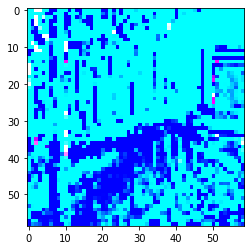

In [ ]:
a = cv2.resize(train_pic[528],(128,128))
b = cv2.resize(train_pic[5],(128,128))
qw = layers.Conv2D(3, (3, 3), activation='relu')(qw4)
qwo = Model(inputs=qw2, outputs=qw)
qwo.compile()
qwi = np.array([a,b])
qws = qwo.predict(qwi)
plt.imshow(cv2.cvtColor(qws[0], cv2.COLOR_BGR2RGB))

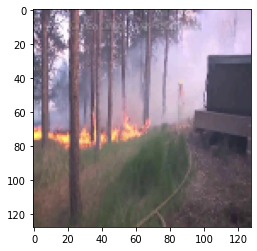

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

In [ ]:
typeVGG.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
typeVGG_History2 = typeVGG.fit(train_pic_permuted, train_label_permuted, batch_size = 32, epochs = 100, validation_split=0.1)
gc.collect()

Epoch 1/100
194/194 [==============================] - 12s 57ms/step - loss: 0.5825 - accuracy: 0.8554 - val_loss: 0.5125 - val_accuracy: 0.8551
Epoch 2/100
194/194 [==============================] - 11s 56ms/step - loss: 0.5005 - accuracy: 0.8571 - val_loss: 0.4487 - val_accuracy: 0.8551
Epoch 3/100
194/194 [==============================] - 11s 56ms/step - loss: 0.4303 - accuracy: 0.8806 - val_loss: 0.3644 - val_accuracy: 0.9043
Epoch 4/100
194/194 [==============================] - 11s 56ms/step - loss: 0.3492 - accuracy: 0.9212 - val_loss: 0.2792 - val_accuracy: 0.9783
Epoch 5/100
194/194 [==============================] - 11s 56ms/step - loss: 0.2579 - accuracy: 0.9771 - val_loss: 0.2197 - val_accuracy: 0.9884
Epoch 6/100
194/194 [==============================] - 11s 55ms/step - loss: 0.2137 - accuracy: 0.9874 - val_loss: 0.1964 - val_accuracy: 0.9913
Epoch 7/100
194/194 [==============================] - 11s 56ms/step - loss: 0.1826 - accuracy: 0.9936 - val_loss: 0.1817 - val_ac

1812

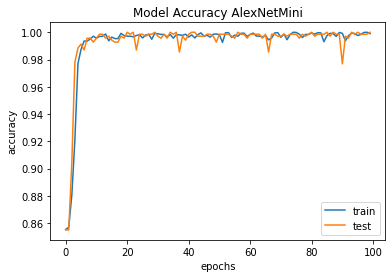

In [ ]:
gc.collect()
import matplotlib.pyplot as plt

plt.plot(typeVGG_History2.history['accuracy'])
plt.plot(typeVGG_History2.history['val_accuracy'])
plt.title('Model Accuracy AlexNetMini')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

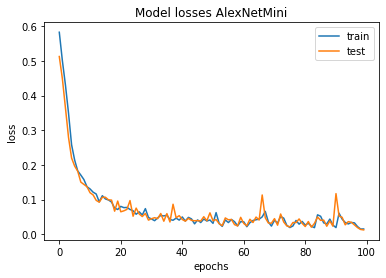

In [ ]:
gc.collect()
plt.plot(typeVGG_History2.history['loss'])
plt.plot(typeVGG_History2.history['val_loss'])
plt.title('Model losses AlexNetMini')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

# Test

In [ ]:
! touch Submission.csv

In [ ]:

s = time.time()

test_pic_names = []

test_csv = open('/root/input/fire_videos/test.csv')
reader = csv.DictReader(test_csv)

for row in reader:
    test_pic_names.append(row['File'])
    
test_csv.close()

e = time.time()
print(e-s)

gc.collect()

test_address = '/root/input/fire_videos/test/'
test_pic = []

s = time.time()
for i in test_pic_names:
    image = cv2.imread(test_address+i)
    image = cv2.resize(image, (image_width, image_height))
    test_pic.append(image)
e = time.time()
print(e-s)

test_pic = np.array(test_pic)
gc.collect()

0.01314854621887207
28.636712074279785


0

In [ ]:
print(len(test_pic))

2820


# Self Submission

In [ ]:
s = time.time()
test_pic_output = typeVGG.predict(test_pic)
e = time.time()
print(e-s)

test_pic_label = []
for i in test_pic_output:
    test_pic_label.append('fire' if i[0]>0.5 else 'not_fire')

2.4391486644744873


In [ ]:
count = 0
for i in test_pic_label:
  if i == 'fire':
    count +=1

print(count)

359


In [ ]:
open('Submission.csv', 'w').close()

output = open('Submission.csv', 'w')

header = ['File', 'Label']
writer = csv.writer(output)
writer.writerow(header)

for i in range(len(test_pic_names)):
    writer.writerow([test_pic_names[i],test_pic_label[i]])
output.close()

In [ ]:
f = open('Submission.csv')

reader = csv.reader(f)
c0=0
for row in reader:
  if row[1]=='fire':
    c0 +=1
f.close()
print(c0)

359


In [ ]:
idle = open('Idle_Submission.csv')
reader = csv.DictReader(idle)

idle_names = []
idle_label = []
for row in reader:
  idle_names.append(row['File'])
  idle_label.append(row['Label'])
idle.close()

In [ ]:
tp1, tn1, fp1, fn1 = 0, 0, 0, 0
for i in range(len(idle_names)):
  if idle_names[i]==test_pic_names[i]:
    if idle_label[i]==test_pic_label[i]:
      if idle_label[i] == 'fire':
        tp1+=1
      else:
        tn1+=1
    else:
      if idle_label[i] == 'fire':
        fn1+=1
      else:
        fp1+=1
l = [[tp1, fn1],[fp1, tn1]]
print(l[0])
print(l[1])
print((tp1+tn1)/(tp1+tn1+fp1+fn1))


[359, 369]
[0, 2092]
0.8691489361702127
